In [53]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import cross_val_score

import seaborn as sns
from matplotlib import rc
rc('text', usetex=True)
rc('font',family='serif')

from sklearn.metrics import confusion_matrix
import sklearn.utils as utils

In [54]:
def split(x,y,split_ratio):
    nevents = len(x)
    print ('There are ',nevents,' events totally')
    n_train = int(nevents*split_ratio)
    print ("There are ",n_train," for training")
    print ("There are ",nevents - n_train," for testing")
  
  
    xtrain =  x[:n_train]
    ytrain =  y[:n_train]
  
    xtest =  x[n_train:]
    ytest =  y[n_train:]
  
    return (x,y,xtrain,ytrain,xtest,ytest)


In [55]:
path = '/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/GSTLAL_EarlyWarning_Dataset/Dataset/'
predicted = np.loadtxt('/Users/miquelmiravet/Projects/IPAM_LA/ML_group/IPAM2021_ML/GSTLAL_EarlyWarning_Dataset/Regression_Result/NN/NN_prediction.csv', delimiter=",")
label = np.loadtxt(path + 'test_label.csv', delimiter=",")
  
split_ratio = 0.7

x,y,xtrain, ytrain, xtest, ytest = split(predicted,label,split_ratio)

print(np.cov(xtrain).shape)

There are  5938  events totally
There are  4156  for training
There are  1782  for testing
(4156, 4156)


Metric :  minkowski
Metric :  manhattan
Metric :  chebyshev
Metric :  mahalanobis
K optimal : [25. 19. 31. 13.]
Scores :  [0.75916534 0.76687597 0.74172895 0.70257127]


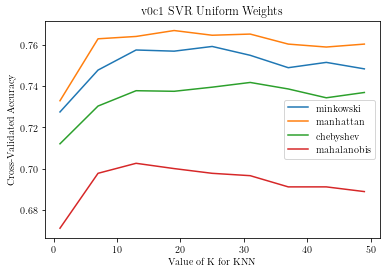

In [192]:
# Different values of K and metrics:

K_max        = 50
K_step       = 6
K_vec     = list(i for i in range(1,K_max,K_step))

metrics = ['minkowski','manhattan','chebyshev','mahalanobis']
metric_params = {'V': np.cov(np.swapaxes(x,0,1))} #for the mahalanobis metric
weights = 'uniform' #'distance' or 'uniform'

score_vec = np.zeros((len(metrics),len(K_vec)))
maxscore = np.zeros(len(metrics))
Kopt = np.zeros(len(metrics))

for m in range(0,len(metrics)):
    print('Metric : ', metrics[m])
    for k in range(0,len(K_vec)):
        if m == 3:
            neigh = KNeighborsClassifier(n_neighbors=K_vec[k], metric = metrics[m], metric_params = metric_params, weights = weights)
        else :
            neigh = KNeighborsClassifier(n_neighbors=K_vec[k], metric = metrics[m], weights = weights)
            
        scores = cross_val_score(neigh, x, y.ravel(), cv=5, scoring='accuracy')
        score_vec[m,k] = scores.mean()
        

    maxscore[m] = np.amax(score_vec[m,:])
    index = np.where(score_vec[m,:] == np.amax(score_vec[m,:]))
    Kopt[m] = K_vec[index[0][0]]
    
    plt.plot(K_vec, score_vec[m,:], label = metrics[m])
    
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.title('v0c1 SVR Uniform Weights')
plt.savefig('plots_KNN/CrossVal_UniWeight_v0c1_SVR.png')

print('K optimal :' , Kopt)
print('Scores : ', maxscore)

0.7882222222222223
25.0


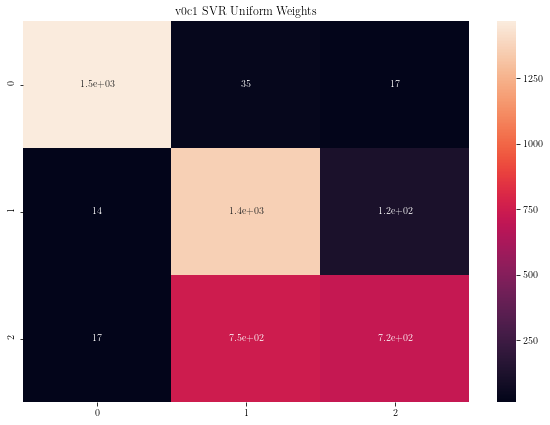

In [194]:
#compute confussion matrix with weighted distance and manhattan, with the optimal K

neigh = KNeighborsClassifier(n_neighbors=int(Kopt[1]), metric = metrics[1], weights = weights)
neigh.fit(xtrain, ytrain.ravel())

score_i = neigh.score(xtest,ytest)
print(score_i)  
print(Kopt[0])
predict = neigh.predict(xtest)
    
cm = confusion_matrix(ytest, predict)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.title('v0c1 SVR Uniform Weights')
plt.savefig('plots_KNN/ConfMat_Manha_UniWeight_v0c1_SVR.png')
